In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import math
from prettytable import PrettyTable
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})

In [2]:
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
features = boston.feature_names

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos.fillna(bos.mean(), inplace=True)

In [8]:
bos['PRICE'] = boston.target

In [9]:
Y = bos['PRICE']

In [10]:
Y.fillna(Y.mean(), inplace=True)

In [11]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
del bos['PRICE']

In [13]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
X=bos

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [17]:
s=StandardScaler()
train_data=s.fit_transform(np.array(X_train))
test_data=s.transform(np.array(X_test))

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [19]:
X_train['CRIM'] = X_train[0]
X_train['ZN'] = X_train[1]
X_train['INDUS'] = X_train[2]
X_train['CHAS'] = X_train[3]
X_train['NOX'] = X_train[4]
X_train['RM'] = X_train[5]
X_train['AGE'] = X_train[6]
X_train['DIS'] = X_train[7]
X_train['RAD'] = X_train[8]
X_train['TAX'] = X_train[9]
X_train['PTRATIO'] = X_train[10]
X_train['B'] = X_train[11]
X_train['LSTAT'] = X_train[12]

In [20]:
X_test['CRIM'] = X_test[0]
X_test['ZN'] = X_test[1]
X_test['INDUS'] = X_test[2]
X_test['CHAS'] = X_test[3]
X_test['NOY'] = X_test[4]
X_test['RM'] = X_test[5]
X_test['AGE'] = X_test[6]
X_test['DIS'] = X_test[7]
X_test['RAD'] = X_test[8]
X_test['TAY'] = X_test[9]
X_test['PTRATIO'] = X_test[10]
X_test['B'] = X_test[11]
X_test['LSTAT'] = X_test[12]

In [21]:
cols = list()
for i in range(13):
    cols.append(i)
X_train.drop(cols, inplace=True, axis=1)
X_test.drop(cols, inplace=True, axis=1)

In [22]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [23]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOY,RM,AGE,DIS,RAD,TAY,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58


In [24]:
with open('boston.pickle', 'wb') as f:
    pickle.dump([X_train, Y_train, X_test, Y_test], f)

In [25]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [26]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [27]:
X_train.shape

(339, 13)

In [28]:
X_test.shape

(167, 13)

# Custom SGD

In [29]:
iterations = 10000
N = len(X_train)
w0 = [0]*13
alpha=-0.0000004
x = X_train
y = Y_train
b0=0
for m in range(iterations):
    for i in range(N):
        w0 = w0-alpha*2*x[i]*(y[i]-(np.dot(np.transpose(w0), x[i])+b0))
        b0 = b0-alpha*2*(y[i]-(np.dot(np.transpose(w0), x[i])+b0))

In [30]:
print(w0)

[-0.195365 0.064434 -0.037516 0.249217 0.229636 5.070803 0.007062
 -0.811076 0.287669 -0.014762 -0.301769 0.022202 -0.446557]


In [31]:
print(b0)

0.6105462783311562


In [32]:
# First method predictions for test
Y_test_predict_method1 = []
for i in range(len(Y_test)):
    Y_test_predict_method1.append(np.dot(np.transpose(X_test[i]), w0)+b0)

In [33]:
mse = mean_squared_error(Y_test,Y_test_predict_method1)
mse_str = "{:f}".format(float(mse))
print(mse_str)


33.962077


# Plots of predicted values Vs actual values of custom SGD

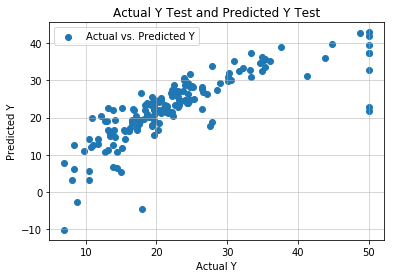

In [34]:
actual = Y_test
predicted = Y_test_predict_method1
plt.scatter(actual, predicted, label = 'Actual vs. Predicted Y')
plt.title('Actual Y Test and Predicted Y Test')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.grid(b=True, linewidth=0.5)
plt.legend()
plt.show()

# SGDRegressor of sklearn

In [35]:
def sklearn_SGD(lr_rate_variation, eta0, n_iter):
    clf=SGDRegressor(penalty=None, learning_rate=lr_rate_variation, eta0=eta0, max_iter=n_iter, tol=None)
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    
    #scatter plot
    plt.scatter(Y_test, Y_predict, label = 'Actual vs. Predicted Y')
    plt.title('Actual Y Test and Predicted Y Test')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.grid(b=True, linewidth=0.5)
    plt.legend()
    plt.show()
    
    sgd_sklearn_error=mean_squared_error(Y_test, Y_predict)
    sgd_sklearn_error_str = "{:f}".format(float(sgd_sklearn_error))
    print('mean sq error=', sgd_sklearn_error_str)
    print('number of iteration=', n_iter)
    
    return (clf.coef_, clf.intercept_, sgd_sklearn_error_str)

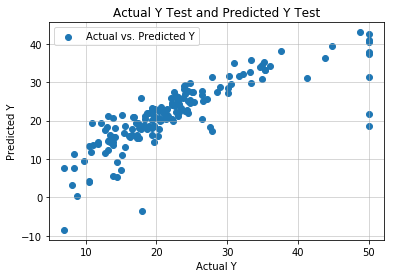

mean sq error= 31.819924
number of iteration= 10000000


In [36]:
weight_sklearn_sgd, bias_sklearn_sgd, sgd_sklearn_error = sklearn_SGD(lr_rate_variation='constant', \
                                                                      eta0=0.00000001, n_iter=10000000)

In [37]:
print("Weight" + str(weight_sklearn_sgd))
print("*"*70)
print("Bias" + str(bias_sklearn_sgd))

Weight[-0.159835 0.043556 -0.039061 0.672970 0.217997 5.760882 -0.018631
 -0.983981 0.225370 -0.011609 -0.509021 0.016427 -0.386745]
**********************************************************************
Bias[2.297093]


# Comparison of weights between custom and sklearn SGD

In [38]:
x = PrettyTable()
x.field_names = ['Features','Custom SGD Weight', 'sklearn SGD Weight']
for i in range(13):
    x.add_row([features[i], w0[i], weight_sklearn_sgd[i]])
print(x)

+----------+-----------------------+-----------------------+
| Features |   Custom SGD Weight   |   sklearn SGD Weight  |
+----------+-----------------------+-----------------------+
|   CRIM   |  -0.19536495896518563 |  -0.15983541380003058 |
|    ZN    |  0.06443386223613243  |  0.043555999949109164 |
|  INDUS   |  -0.03751592225547564 |  -0.03906131795123155 |
|   CHAS   |  0.24921746681839702  |   0.6729697287807989  |
|   NOX    |   0.2296356679108469  |  0.21799711375897848  |
|    RM    |   5.070802686796255   |   5.760881879223658   |
|   AGE    |  0.007061592754983097 | -0.018630733635408042 |
|   DIS    |   -0.811075937133681  |  -0.9839809878941576  |
|   RAD    |   0.2876690425940161  |   0.2253703841073455  |
|   TAX    | -0.014761719149160824 | -0.011608640493301075 |
| PTRATIO  |  -0.3017687147261478  |  -0.5090209101470312  |
|    B     |  0.022201650962732807 |  0.016427456194070662 |
|  LSTAT   |  -0.4465565593899071  |  -0.38674522549807155 |
+----------+------------

# Comparison between mean squared error between custom and sklearn SGD

In [39]:
print("Custom SGD Mean Squared Error= " + str(mse_str))
print("sklearn SGD Mean Squared Error= " + str(sgd_sklearn_error))

Custom SGD Mean Squared Error= 33.962077
sklearn SGD Mean Squared Error= 31.819924


# Conclusion

There is slight difference between weights of Custom SGD vs. sklearn's SGD. Mean squared error of Custom SGD turned out to be 33.962077 whereas that of sklearn's SGD is 31.688433.